In [ ]:
# ----------- README for the Datasets ----------------
#  Dataset_oland ha 4210 immagini e 172 diverse labels con dim 50x75[w,h] in grayscale
#  Dataset_nostro ha 1310 immagini e 48 diverse labels con dim 50x75[w,h] in grayscale
#  I due dataset hanno in comune 40 label diverse e utilizzando solo queste otteniamo
#       - Dataset_oland_adjust ha 3101 immagini con 40 labels diverse
#       - Dataset_nostro_adjust ha 1207 immagini con 40 labels diverse
#       - Le 8 labels di Dataset_nostro che non possono essere classificate sono: A1,A40,Aa1,D55,U6,W3,Y4,Z2
#       => tot_img = 4308 , tot_classes = 40 

In [ ]:
# LOCALE

%run util.ipynb
%run model.ipynb

# Load the TensorBoard notebook extension
%load_ext tensorboard

path_tot = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/tot"
path_train = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/train"
path_testA = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/testA"
path_testB = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/testB"
path_train_aug = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/train_aug"

path_train_flip = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/train_flip"
path_test_flip = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/test_flip"
path_train_flip_aug = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/train_flip_aug"
path_test_flip_aug = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/test_flip_aug"

path_train_Kfold_flip_aug = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/K-fold/1/train_HF_aug"
path_val_Kfold_flip = "/Users/marco/Desktop/tesi/campioni/datasets(200x200)/K-fold/1/val_HF"


log_filepath = "/Users/marco/Desktop/tesi/code/logs"
checkpoint_filepath = "/Users/marco/Desktop/tesi/code/weights"
weights_path = "/Users/marco/Desktop/tesi/risultati/my_Xception3/weights/no_aug_accuracy_ADAM"

In [ ]:
# GOOGLE COOLAB

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/tot.zip" -d "/content" # -q quit mode ;  -u part controls extraction only if new/necessary

!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/train.zip" -d "/content"
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/train_aug.zip" -d "/content" 
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/train_aug_flip.zip" -d "/content" 

!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/val.zip" -d "/content"
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/val_aug.zip" -d "/content"
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/val_aug_flip.zip" -d "/content"

!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/test.zip" -d "/content"
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/test_flip.zip" -d "/content" 
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/flippedtest.zip" -d "/content" 

#K-fold
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/K-fold/5_train_HF_aug.zip" -d "/content" 
!unzip -qu "/content/drive/MyDrive/ColabNotebooks/datasets/K-fold/5_val.zip" -d "/content" 


%run /content/drive/MyDrive/ColabNotebooks/code/util.ipynb
%run /content/drive/MyDrive/ColabNotebooks/code/model.ipynb

# Load the TensorBoard notebook extension
%load_ext tensorboard

# PATH
path_tot = "/content/tot"

path_train = "/content/train"
path_train_aug = "/content/train_aug"
path_train_aug_flip = "/content/train_aug_flip"

path_val = "/content/val"
path_val_aug = "/content/val_aug"
path_val_aug_flip = "/content/val_aug_flip"

path_test = "/content/test"
#path_test = "/content/onlyfliptest"
path_test_flip = "/content/test_flip"

path_train_Kfold_flip_aug = "/content/5_train_HF_aug"
path_val_Kfold_flip = "/content/5_val"


log_filepath = "/content/drive/MyDrive/ColabNotebooks/logs"
checkpoint_filepath = "/content/drive/MyDrive/ColabNotebooks/weights"
weights_path = "/content/drive/MyDrive/ColabNotebooks/weights"




# DATASET PREPARATION
     
# loading datasets from disco
X_tot, y_tot = load_dataset(path_tot, "jpg")

X_train, y_train = load_dataset(path_train, "jpg")
X_train_aug, y_train_aug = load_dataset(path_train_aug, "jpg")
X_train_aug_flip, y_train_aug_flip = load_dataset(path_train_aug_flip, "jpg")

X_val, y_val = load_dataset(path_val, "jpg")
X_val_aug, y_val_aug = load_dataset(path_val_aug, "jpg")
X_val_aug_flip, y_val_aug_flip = load_dataset(path_val_aug_flip, "jpg")

X_test, y_test = load_dataset(path_test, "jpg")
X_test_flip, y_test_flip = load_dataset(path_test_flip, "jpg")


X_train_Kfold_flip_aug, y_train_Kfold_flip_aug = load_dataset(path_train_Kfold_flip_aug, "jpg")
X_val_Kfold_flip, y_val_Kfold_flip = load_dataset(path_val_Kfold_flip, "jpg")


# encoding delle label  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_enc = preprocessing.LabelEncoder()
label_enc.fit(y_tot) 
y_tot = label_enc.transform(y_tot) # trasforma le label da caratteri a numeri

y_train = label_enc.transform(y_train) # trasforma le label da caratteri a numeri
y_train_aug = label_enc.transform(y_train_aug) # trasforma le label da caratteri a numeri
y_train_aug_flip = label_enc.transform(y_train_aug_flip) # trasforma le label da caratteri a numeri

y_val = label_enc.transform(y_val) # trasforma le label da caratteri a numeri
y_val_aug = label_enc.transform(y_val_aug) # trasforma le label da caratteri a numeri
y_val_aug_flip = label_enc.transform(y_val_aug_flip) # trasforma le label da caratteri a numeri

y_test = label_enc.transform(y_test) # trasforma le label da caratteri a numeri
y_test_flip = label_enc.transform(y_test_flip) # trasforma le label da caratteri a numeri

y_train_Kfold_flip_aug = label_enc.transform(y_train_Kfold_flip_aug) # trasforma le label da caratteri a numeri
y_val_Kfold_flip = label_enc.transform(y_val_Kfold_flip) # trasforma le label da caratteri a numeri

n_classes = len(list(label_enc.classes_))

# trasformo da list a np array
X_tot = np.asarray(X_tot)

X_train = np.asarray(X_train)
X_train_aug = np.asarray(X_train_aug)
X_train_aug_flip = np.asarray(X_train_aug_flip)

X_val = np.asarray(X_val)
X_val_aug = np.asarray(X_val_aug)
X_val_aug_flip = np.asarray(X_val_aug_flip)

X_test = np.asarray(X_test)
X_test_flip = np.asarray(X_test_flip)

X_train_Kfold_flip_aug = np.asarray(X_train_Kfold_flip_aug)
X_val_Kfold_flip = np.asarray(X_val_Kfold_flip)

# Aggiungo una extra-dimensione alle immagini e faccio Hot-encoding dei labels perche' e' come le vuole in input il modello cnn
X_tot, y_tot = add_extra_dim(X_tot, y_tot, n_classes)

X_train, y_train = add_extra_dim(X_train, y_train, n_classes)
X_train_aug, y_train_aug = add_extra_dim(X_train_aug, y_train_aug, n_classes)
X_train_aug_flip, y_train_aug_flip = add_extra_dim(X_train_aug_flip, y_train_aug_flip, n_classes)

X_val, y_val = add_extra_dim(X_val, y_val, n_classes)
X_val_aug, y_val_aug = add_extra_dim(X_val_aug, y_val_aug, n_classes)
X_val_aug_flip, y_val_aug_flip = add_extra_dim(X_val_aug_flip, y_val_aug_flip, n_classes)

X_test, y_test = add_extra_dim(X_test, y_test, n_classes)
X_test_flip, y_test_flip = add_extra_dim(X_test_flip, y_test_flip, n_classes)

X_train_Kfold_flip_aug, y_train_Kfold_flip_aug = add_extra_dim(X_train_Kfold_flip_aug, y_train_Kfold_flip_aug, n_classes)
X_val_Kfold_flip, y_val_Kfold_flip = add_extra_dim(X_val_Kfold_flip, y_val_Kfold_flip, n_classes)

print('Tot: ',X_tot.shape, y_tot.shape)

print('Train: ',X_train.shape, y_train.shape)
print('Train aug: ',X_train_aug.shape, y_train_aug.shape)
print('Train aug and flip: ',X_train_aug_flip.shape, y_train_aug_flip.shape)

print('Val: ',X_val.shape, y_val.shape)
print('Val aug: ',X_val_aug.shape, y_val_aug.shape)
print('Val aug and flip: ',X_val_aug_flip.shape, y_val_aug_flip.shape)

print('Test: ',X_test.shape, y_test.shape)
print('Test flip: ',X_test_flip.shape, y_test_flip.shape)

print('Train Kfold flip with aug images and labels: ',X_train_Kfold_flip_aug.shape, y_train_Kfold_flip_aug.shape)
print('Val Kfold flip images and labels: ',X_val_Kfold_flip.shape, y_val_Kfold_flip.shape)

In [ ]:
# INFO GPU
!nvidia-smi

In [ ]:
# DATASET INFO
#train_test_labels_analysis(y_test_A, y_test_B, label_enc)
#get_labels_number_in_category(dataset_labels_aug, label_enc, view=True)
#get_labels_number_in_category(y_test, label_enc, view=True)

# Data Augmentation

In [ ]:
#DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20, # rotation
    width_shift_range=0.1, # horizontal shift
    height_shift_range=0.1, # vertical shift
    zoom_range=0.05, # zoom
    horizontal_flip=True, # horizontal flip
    brightness_range=[0.2,1.2]) # brightness
#datagen.fit(X_train)

X, y = X_train, y_train

for i in range(0, 10):
    it = datagen.flow(X, y, batch_size=1)
    next_it = next(it)
    image = next_it[0]
    label = next_it[1]
    #images = np.append(images, image, axis= 0)
    #labels = np.append(labels, label, axis=0)
    #print("augmentation of " + str(i+1) + " data")
    plt.imshow(image.reshape(image.shape[1], image.shape[2]), cmap="gray")
    plt.show()

In [ ]:
#DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20, # rotation
    width_shift_range=0.1, # horizontal shift
    height_shift_range=0.1, # vertical shift
    zoom_range=0.05, # zoom
    horizontal_flip=True, # horizontal flip
    brightness_range=[0.2,1.2]) # brightness
#datagen.fit(X_train)

n_aug = 10000 - np.shape(X_train)[0] # in modo da arrivare a 1000 campioni di train
X_train_aug, y_train_aug = data_augmentation(datagen, X_train, y_train, n_aug)


save_dataset(path_to_save_aug, X_train_aug, categorical_to_decoded(y_train_aug, label_enc))

print('Dimensione array di immagini oland dopo data aug:',np.shape(X_train_aug))
print('Dimensione array labels oland dopo il data aug:',np.shape(y_train_aug))  

#for i in range(1,n_aug):
#    label_int = np.argmax(y_train[3100+i]) 
#    label = label_enc.inverse_transform([label_int])[0]   
#    plt.figure(i)
#    plt.imshow(X_train[3100+i], cmap="gray")
#    plt.title(label)
#plt.show()

In [ ]:
# CREATE AND SAVE DATASET(train(with_aug))

def create_and_save_data_augmentation_dataset(save=False):
    # dataset path
    path_oland = "/Users/marco/Desktop/datasets/trainA"
    path = '/Users/marco/Desktop/datasets/trainB'

    # creo i filelist(path di tutte le immagini del dataset) dei dataset
    filelist_oland = create_filelist(path_oland, "jpg") 
    filelist = create_filelist(path, "jpg")       

    # creo i dataset
    dataset_images_oland, dataset_labels_oland = make_dataset(filelist_oland)
    dataset_images, dataset_labels = make_dataset(filelist)

    
    dataset_images = dataset_images_oland + dataset_images
    dataset_labels = dataset_labels_oland + dataset_labels


    # encoding delle label  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
    label_enc = preprocessing.LabelEncoder()
    label_enc.fit(dataset_labels)  
    dataset_labels_encoded = label_enc.transform(dataset_labels) # trasforma le label da caratteri a numeri
    n_classes = len(list(label_enc.classes_))

    # trasformo da list a np array
    dataset_images = np.asarray(dataset_images)

    # Aggiungo una extra-dimensione alle immagini e hot-encoding dei labels perche' e' come le vuole in input il modello cnn
    #dataset_images_oland, dataset_labels_oland_encoded = add_extra_dim(dataset_images_oland, dataset_labels_oland_encoded, n_classes)
    #dataset_images, dataset_labels_encoded = add_extra_dim(dataset_images, dataset_labels_encoded, n_classes)


    #DATA AUGMENTATION
    datagen = ImageDataGenerator(
        rotation_range=2, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.05, # zoom
        horizontal_flip=False, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness
    #datagen.fit(X_train)


    dataset_images_aug, dataset_labels_aug = [],[]
    all_labels = list(set(dataset_labels))
    for index_l,l in enumerate(all_labels):
        img_one_class = []
        for i,label in enumerate(dataset_labels):
            if label == l:
                img_one_class.append(dataset_images[i])
        img_one_class = np.asarray(img_one_class)
        label_one_class = [l for i in range(img_one_class.shape[0])]
        label_one_class = label_enc.transform(label_one_class)
        label_one_class = np.asarray(label_one_class)
        img_one_class, label_one_class = add_extra_dim(img_one_class, label_one_class, n_classes)
   
        n_aug = int(dataset_images.shape[0]/(img_one_class.shape[0] * 10))
        print(label_enc.inverse_transform(np.argmax(label_one_class, axis=1))[0], img_one_class.shape[0], n_aug)
        img_one_class, label_one_class = data_augmentation(datagen, img_one_class, label_one_class, n_aug)
        #print(imgs.shape)
        #img_one_class = np.append(img_one_class, imgs, axis= 0)
        #label_one_class = np.append(label_one_class, labs, axis= 0)

        if index_l == 0:
            dataset_images_aug = img_one_class
            dataset_labels_aug = label_one_class
        else:
            dataset_images_aug = np.append(dataset_images_aug, img_one_class, axis= 0)
            dataset_labels_aug = np.append(dataset_labels_aug, label_one_class, axis= 0)

    if save==True:
        save_dataset(path_to_save_aug, dataset_images_aug, categorical_to_decoded(dataset_labels_aug, label_enc))
    
    return dataset_images_aug, dataset_labels_aug, label_enc

  #for i,img in enumerate(imgs):
  #    plt.figure(i)
  #    plt.imshow(imgs[i], cmap="gray")
  #plt.show()

X_train_aug, y_train_aug, label_enc = create_and_save_data_augmentation_dataset(save=False)

In [ ]:
#DATA AUGMENTATION

def aug_dataset(X, y, label_enc, path_to_save, save=False):

    if X.ndim == 4:
        X  = X.squeeze(axis=-1)
    if y.ndim == 2:
        y = categorical_to_decoded(y, label_enc)
    
    datagen = ImageDataGenerator(
        rotation_range=2, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.05, # zoom
        horizontal_flip=False, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness
    #datagen.fit(X_train)

    # Set dataset to increse
    #X, y = X_train_flip, y_train_flip
    
    
    X_aug, y_aug = [],[]
    all_labels = list(set(y))
    for index_l,l in enumerate(all_labels):
        img_one_class = []
        for i,label in enumerate(y):
            if label == l:
                img_one_class.append(X[i])
        img_one_class = np.asarray(img_one_class)
        label_one_class = [l for i in range(img_one_class.shape[0])]
        label_one_class = label_enc.transform(label_one_class)
        label_one_class = np.asarray(label_one_class)
        img_one_class, label_one_class = add_extra_dim(img_one_class, label_one_class, n_classes)
   
        n_aug = int(X.shape[0]/(img_one_class.shape[0] * 10))
        print(label_enc.inverse_transform(np.argmax(label_one_class, axis=1))[0], img_one_class.shape[0], n_aug)
        img_one_class, label_one_class = data_augmentation(datagen, img_one_class, label_one_class, n_aug)

        if index_l == 0:
            X_aug = img_one_class
            y_aug = label_one_class
        else:
            X_aug = np.append(X_aug, img_one_class, axis= 0)
            y_aug = np.append(y_aug, label_one_class, axis= 0)

    if save==True:
        save_dataset(path_to_save, X_aug, categorical_to_decoded(y_aug, label_enc))
    
    return X_aug, y_aug

  #for i,img in enumerate(imgs):
  #    plt.figure(i)
  #    plt.imshow(imgs[i], cmap="gray")
  #plt.show()

X_aug, y_aug = aug_dataset(X_train_flip, y_train_flip, label_enc, save=True, path_to_save="/Users/marco/Desktop/train_flip_aug")
X2_aug, y2_aug = aug_dataset(X_test_flip, y_test_flip, label_enc, save=True, path_to_save="/Users/marco/Desktop/test_flip_aug")


In [ ]:
print('Dimensione array di immagini dopo data aug:',np.shape(X_train_flip))
print('Dimensione array labels dopo il data aug:',np.shape(y_train_flip))  
get_labels_number_in_category(y_train_flip, label_enc, view=True)

# K-fold

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True)

count = 1
for train_index, test_index in skf.split(X_tot, categorical_to_decoded(y_tot, label_enc)):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_tot[train_index], X_tot[test_index]
    y_train, y_test = y_tot[train_index], y_tot[test_index]
    
    save_dataset("/Users/marco/Desktop/K-fold/"+str(count)+"/train", X_train, categorical_to_decoded(y_train, label_enc))
    save_dataset("/Users/marco/Desktop/K-fold/"+str(count)+"/train_HF", X_train, categorical_to_decoded(y_train, label_enc), horizontal_flip=True)
    save_dataset("/Users/marco/Desktop/K-fold/"+str(count)+"/test", X_test, categorical_to_decoded(y_test, label_enc))
    save_dataset("/Users/marco/Desktop/K-fold/"+str(count)+"/test_HF", X_test, categorical_to_decoded(y_test, label_enc), horizontal_flip=True)
    
    print(str(count), X_train.shape, X_test.shape)
    print(str(count), y_train.shape, y_test.shape)
    count = count + 1

# Tranfer Learning

In [ ]:
#TRANSFER LEARNING 1a PARTE


base_model = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(299, 299, 3)))

base_model.trainable = False

head_model = base_model.output

#RESNET
#head_model = keras.layers.AveragePooling2D(pool_size=(7, 7))(head_model)
#head_model = keras.layers.Flatten(name="flatten")(head_model)
#head_model = keras.layers.Dense(128, activation="relu")(head_model)
#head_model = keras.layers.Dropout(0.15)(head_model)
#head_model = keras.layers.Dense(n_classes, activation="softmax")(head_model)

#INCEPTION
#head_model = keras.layers.Flatten(name="flatten")(head_model)
#head_model = keras.layers.Dense(n_classes, activation="softmax")(head_model)
#V2
head_model = keras.layers.GlobalAveragePooling2D()(head_model)
#head_model = keras.layers.AveragePooling2D(pool_size=(8, 8))(head_model)
#head_model = keras.layers.Flatten(name="flatten")(head_model)
head_model = keras.layers.Dense(256, activation="relu")(head_model)
head_model = keras.layers.Dropout(0.15)(head_model)
head_model = keras.layers.Dense(n_classes, activation="softmax")(head_model)

#XCEPTION
#head_model = keras.layers.AveragePooling2D(pool_size=(10, 10))(head_model)
#head_model = keras.layers.Flatten(name="flatten")(head_model)
#head_model = keras.layers.Dense(64, activation="relu")(head_model)
#head_model = keras.layers.Dropout(0.10)(head_model)
#head_model = keras.layers.Dense(n_classes, activation="softmax")(head_model)


model = Model(inputs=base_model.input, outputs=head_model)
model.summary()

# COMPILE
top3 = tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3")
top5 = tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")
model.compile(optimizer=Adam(0.00001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy', top3, top5])

# IMAGES GRAYSCALE TO "RGB"
X_train_aug_flip_r = np.repeat(X_train_aug_flip, 3, -1)
X_val_r = np.repeat(X_val, 3, -1)
X_test_r = np.repeat(X_test, 3, -1)

#model.load_weights(weights_path +"/weights.73-0.77.hdf5")
# NETWORK TRAINING
log_dir = log_filepath + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

checkpoint = ModelCheckpoint(checkpoint_filepath + "/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5" ,
                             save_weights_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1,
                             save_freq='epoch')

lr_scheduler = LearningRateScheduler(lr_schedule_tl)
history = model.fit(X_train_aug_flip_r, y_train_aug_flip,
                    validation_data=(X_val_r, y_val), 
                    epochs=250, shuffle=True, callbacks=[checkpoint])

#np.save('/content/drive/MyDrive/ColabNotebooks/history_train.npy',history.history)

In [ ]:
# TRANSFER LEARNING 2a PARTE FINE TUNING


base_model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

base_model.trainable = True

head_model = base_model.output
#head_model = keras.layers.AveragePooling2D(pool_size=(7, 7))(head_model)
#head_model = keras.layers.Flatten(name="flatten")(head_model)
head_model = GlobalAveragePooling2D()(head_model)
head_model = keras.layers.Dense(128, activation="relu")(head_model)
head_model = keras.layers.Dropout(0.15)(head_model)
head_model = keras.layers.Dense(n_classes, activation="softmax")(head_model)

model = Model(inputs=base_model.input, outputs=head_model)
#model.summary()

# COMPILE
top3 = tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3")
top5 = tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")
model.compile(optimizer=Adam(), 
            loss='categorical_crossentropy', 
            metrics=['accuracy', top3, top5])

model.load_weights(weights_path +"/weights.startResnet.hdf5")
# IMAGES GRAYSCALE TO "RGB"
X_train_aug_flip_r = np.repeat(X_train_aug_flip, 3, -1)
X_val_r = np.repeat(X_val, 3, -1)
X_test_r = np.repeat(X_test, 3, -1)



# NETWORK TRAINING
log_dir = log_filepath + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

checkpoint = ModelCheckpoint(checkpoint_filepath + "/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5" ,
                             save_weights_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=False,
                             verbose=1,
                             save_freq='epoch')

lr_scheduler = LearningRateScheduler(lr_schedule_ft)
history = model.fit(X_train_aug_flip_r, y_train_aug_flip,
                    validation_data=(X_val_r, y_val), 
                    epochs=100, shuffle=True, callbacks=[checkpoint, lr_scheduler])

#np.save('/content/drive/MyDrive/ColabNotebooks/history_train.npy',history.history)

In [ ]:
# CHOOSE THE BEST WEIGHTS to TEST

hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test_r, y_test, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
#np.save('/content/drive/MyDrive/ColabNotebooks/history_test.npy',hist_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/"+weights_max)
y_pred = model.predict(X_test_r)
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/weights.17-0.93.hdf5")
y_pred = model.predict(X_test_r)
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))

In [ ]:
files.download('/content/drive/MyDrive/ColabNotebooks/history_train.npy')
files.download('/content/drive/MyDrive/ColabNotebooks/history_test.npy')
#files.download('/content/drive/MyDrive/ColabNotebooks/history_test_flip.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Build Model

In [21]:
 def build_model():
    model = ATCNet(shape=(np.shape(X_train_aug_flip)[1], np.shape(X_train_aug_flip)[2], 1), n_classes=n_classes)

    top3 = tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top3")
    top5 = tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top5")
    model.compile(optimizer=Adam(), 
                loss='categorical_crossentropy', 
                metrics=['accuracy', top3, top5])

    #model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
    #                  loss='categorical_crossentropy', 
    #                  metrics=['accuracy'])

    #print(len(model.layers))
    return model
model = build_model()

# Training

In [ ]:
# NETWORK TRAINING

model = build_model()
model.summary()
log_dir = log_filepath + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

checkpoint = ModelCheckpoint(checkpoint_filepath + "/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5" ,
                             save_weights_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=False,
                             verbose=1,
                             save_freq='epoch')

lr_scheduler = LearningRateScheduler(lr_schedule_old_new)
history = model.fit(X_train_aug_flip, y_train_aug_flip,
                    validation_data=(X_val, y_val), 
                    epochs=100, batch_size=32, shuffle=True, callbacks=[checkpoint, lr_scheduler])

#np.save('/content/drive/MyDrive/ColabNotebooks/history_train.npy',history.history)
#files.download('/content/drive/MyDrive/ColabNotebooks/history_train.npy')


# CHOOSE THE BEST WEIGHTS to TEST
hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test, y_test, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
np.save('/content/drive/MyDrive/ColabNotebooks/history_test.npy',hist_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/"+weights_max)
y_pred = model.predict(X_test)
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)
# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))



# PLOT TRAINING, VALIDATION AND TEST ACCURACY AND LOSS
hist_test = np.load('/content/drive/MyDrive/ColabNotebooks/history_test.npy', allow_pickle='TRUE').item()
history = np.load('/content/drive/MyDrive/ColabNotebooks/history_train.npy', allow_pickle='TRUE').item()
plot_train_validation_loss_accuracy3(history, hist_test)

In [ ]:
# CHOOSE THE BEST WEIGHTS to TEST
hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in sorted(os.listdir(weights_path)):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test, y_test, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
#np.save('/content/drive/MyDrive/ColabNotebooks/history_test.npy',hist_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/"+weights_max)
y_pred = model.predict(X_test)
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)
# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))

In [ ]:
# CHOOSE THE BEST WEIGHTS to TEST FLIPPED
hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in sorted(os.listdir(weights_path)):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test_flip, y_test_flip, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
np.save('/content/drive/MyDrive/ColabNotebooks/history_test_flip.npy',hist_test)

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/ColabNotebooks/log/fit

#K-fold training

In [ ]:
# NETWORK TRAINING K-FOLD

model = build_model()

log_dir = log_filepath + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

checkpoint = ModelCheckpoint(checkpoint_filepath + "/weights.{epoch:02d}.hdf5" ,
                             save_weights_only=True,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=False,
                             verbose=1,
                             save_freq='epoch')

lr_scheduler = LearningRateScheduler(lr_schedule_old_new)
history = model.fit(X_train_Kfold_flip_aug, y_train_Kfold_flip_aug, 
                    epochs=100, shuffle=True, callbacks=[checkpoint, lr_scheduler])

np.save('/content/drive/MyDrive/ColabNotebooks/history_train.npy',history.history)
#files.download('/content/drive/MyDrive/ColabNotebooks/history_train.npy')

# CHOOSE THE BEST WEIGHTS to TEST

hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_val_Kfold_flip, y_val_Kfold_flip, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
np.save('/content/drive/MyDrive/ColabNotebooks/history_test.npy',hist_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/"+weights_max)
y_pred = model.predict(X_val_Kfold_flip)
y_test_decoded = np.argmax(y_val_Kfold_flip, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)

# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))

# PLOT TRAINING AND VALIDATION ACCURACY
hist_test = np.load('/content/drive/MyDrive/ColabNotebooks/history_test.npy', allow_pickle='TRUE').item()
history = np.load('/content/drive/MyDrive/ColabNotebooks/history_train.npy', allow_pickle='TRUE').item()

plt.figure(figsize=(15,5))
plt.plot(hist_test['test_accuracy'])
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')

plt.show()

# Evaluate

In [ ]:
# CHOOSE THE BEST WEIGHTS to TEST
hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
#for weights in sorted(os.listdir(weights_path)):
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test, y_test, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
#np.save('/content/drive/MyDrive/ColabNotebooks/history_test.npy',hist_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
model.load_weights(weights_path +"/"+weights_max)
y_pred = model.predict(X_test)
y_test_decoded = np.argmax(y_test, axis=1)
y_pred_decoded = np.argmax(y_pred, axis=1)
# Print f1, precision, and recall scores
print("accuracy = ", accuracy_score(y_test_decoded, y_pred_decoded))
print("precison = ", precision_score(y_test_decoded, y_pred_decoded , average="macro"))
print("recall = ", recall_score(y_test_decoded, y_pred_decoded , average="macro"))
print("f1_score =", f1_score(y_test_decoded, y_pred_decoded , average="macro"))

In [ ]:
# CHOOSE THE BEST WEIGHTS to TEST FLIPPED

hist_test = {}
accuracy_max = 0
weights_max = ""
test_loss, test_accuracy, test_top3, test_top5 = [],[],[],[]
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        l, a, top3, top5 = model.evaluate(X_test_flip, y_test_flip, verbose=1)
        test_loss.append(l)
        test_accuracy.append(a)
        test_top3.append(top3)
        test_top5.append(top5)
        if accuracy_max < a:
            accuracy_max = a
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))
hist_test = {"test_loss":test_loss, "test_accuracy":test_accuracy, "test_top3":test_top3, "test_top5":test_top5}
np.save('/content/drive/MyDrive/ColabNotebooks/history_test_flip.npy',hist_test)

In [ ]:
# CHOOSE THE BEST WEIGHTS (TOT, A, B)

accuracy_max = 0
weights_max = ""
for weights in os.listdir(weights_path):
    if(weights.endswith(".hdf5")):
        print(weights)
        model.load_weights(weights_path +"/"+ weights)
        lossA, accuracyA = model.evaluate(X_test_A, y_test_A, verbose=1)
        lossB, accuracyB = model.evaluate(X_test_B, y_test_B, verbose=1)
        loss, accuracy = model.evaluate(X_test_tot, y_test_tot, verbose=1)
        loss, accuracy = model.evaluate(X_test_flip, y_test_flip, verbose=1)
        if accuracy_max < accuracy:
            accuracy_max = accuracy
            weights_max = weights
        print("---------------------------------------------------------------------------------------------")
print(weights_max + "  accuracy: " + str(accuracy_max))

In [ ]:
model.evaluate(X_test, y_test, verbose=1, batch_size=1)
model.evaluate(X_test, y_test, verbose=1, batch_size=32)

In [ ]:
files.download('/content/drive/MyDrive/ColabNotebooks/history_train.npy')
files.download('/content/drive/MyDrive/ColabNotebooks/history_test.npy')
files.download('/content/drive/MyDrive/ColabNotebooks/history_test_flip.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# LOAD AND SAVE WEIGHTS AND HISTORY
#model.save_weights("/content/checkpoint/weights.34-0.71.hdf5")
#model.load_weights("/content/checkpoint/weights.02-0.95.hdf5")

#np.save('/content/drive/MyDrive/ColabNotebooks/history.npy',history.history)
#history = np.load('/content/drive/MyDrive/ColabNotebooks/history.npy', allow_pickle='TRUE').item()

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(32, 24))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_label = categorical_to_decoded(y_test, label_enc)
y_test_decoded = y_test.argmax(axis=1)


matrix = confusion_matrix(y_test_decoded, predictions)    


plot_confusion_matrix(cm=matrix, 
                    normalize    = False,
                    target_names = ["1","2"],
                    title        = "Confusion Matrix")


# Plot

In [ ]:
# PLOT TRAINING AND VALIDATION ACCURACY AND LOSS


h = np.load('/content/drive/MyDrive/ColabNotebooks/history_train.npy', allow_pickle='TRUE').item()

#h['accuracy'] = h['accuracy'][0:51]
#h['val_accuracy'] = h['val_accuracy'][0:51]
#h['loss'] = h['loss'][0:51]
#h['val_loss'] = h['val_loss'][0:51]

plot_train_validation_loss_accuracy2(h)

# Prediction

(647, 100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
716 100% 82/82 N35
578 100% 73/73 M17
414 95% 39/41 S29
408 100% 42/42 X1
344 97% 34/35 G43
338 98% 45/46 G17
320 94% 30/32 D21
270 97% 30/31 I9
234 100% 24/24 V31
206 100% 20/20 E34
180 100% 16/16 Q3
150 100% 13/13 R8
150 100% 3/3 X8
150 80% 4/5 Z1
150 100% 16/16 D36
150 100% 9/9 I10
150 100% 6/6 M23
150 100% 7/7 D4
150 92% 11/12 G1
150 100% 22/22 V28
150 100% 2/2 Y1
150 67% 2/3 U7
150 100% 2/2 S34
150 100% 6/6 O1
150 91% 10/11 D46
150 100% 1/1 F35
150 100% 8/8 O49
150 89% 8/9 V30
150 100% 4/4 O4
150 67% 2/3 W11
150 100% 5/5 Y5
150 100% 2/2 F31
150 75% 3/4 R4
150 75% 3/4 Q1
150 100% 5/5 W24
150 100% 3/3 D2
150 100% 8/8 D58
150 100% 3/3 E23
150 100% 19/19 V13
150 100% 10/10 O34
-------
Correct prediction: 632/647


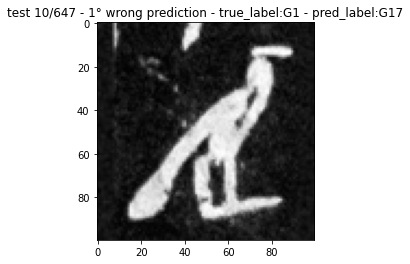

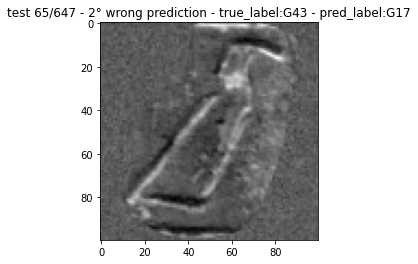

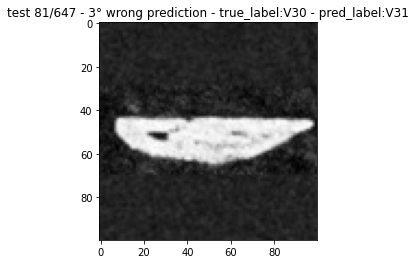

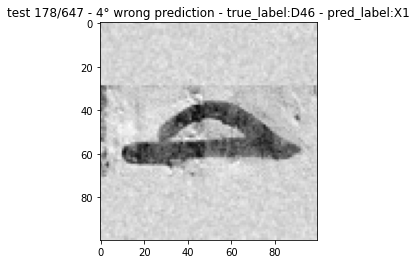

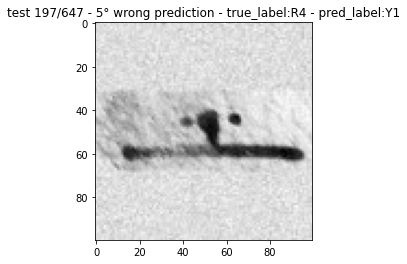

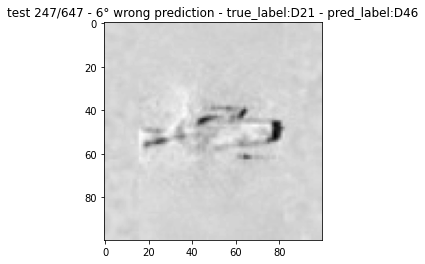

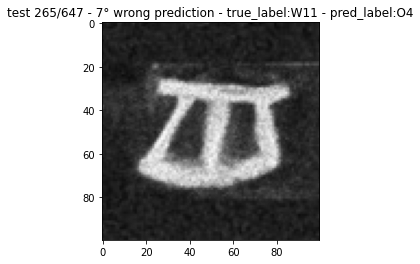

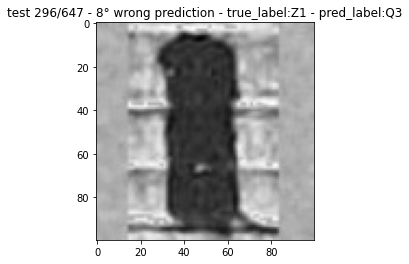

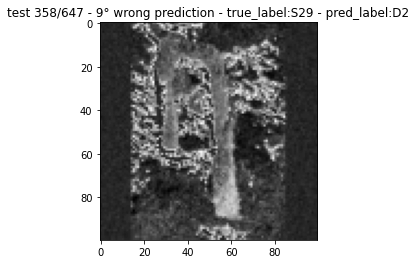

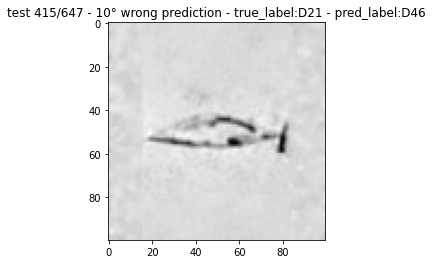

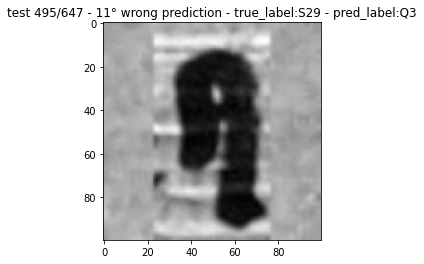

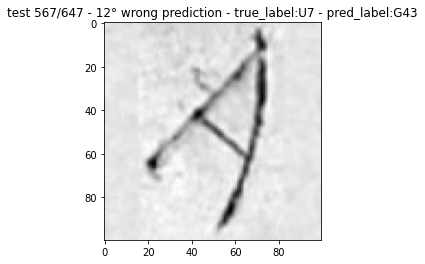

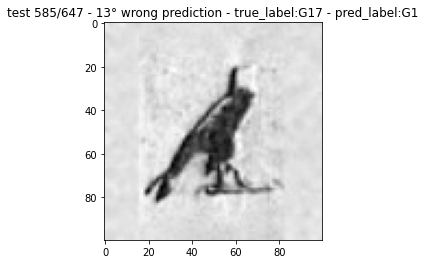

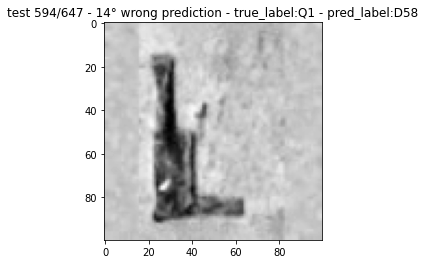

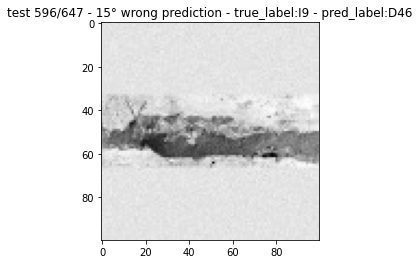

In [ ]:
# PREDICTION
predictions = model.predict(X_test)
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2] ) 
get_prediction_data(predictions, X_test_reshape, y_test, label_enc, 
                    summary=False, details=True, plot=(1,"all",None), y_train=y_train_aug_flip)